In [1]:
print('hello world')

hello world


# Setup

Al iniciar un nuevo repositorio debemos trabajar con un environment dedicado o genérico, con una serie de librerías que debemos conocer correctamente.

En este caso, dejaré el requirements para que trabajemos todos con la misma versión.

Ahora, despacito y buena letra:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# disable seaborn warnings
# import warnings
# warnings.filterwarnings("ignore")

In [3]:
df_base = pd.read_csv('..\data\Crime_Data_from_2020_to_Present\Crime_Data_from_2020_to_Present.csv')

In [4]:
df_base.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [5]:
""""

Lo primero que debemos hacer es identificar las variables más importantes para nuestro análisis. En este caso, podríamos centrarnos en diferentes perspectivas, como la temporal, 
la geográfica o la tipológica. También podríamos querer hacer un análisis de cuales son los agentes de polícia que más intervienen en los crímenes, o cuales son los crímenes más comunes
que ellos resuelven.

En esta primera aproximación, vamos a centrarnos en las variables temporales y geográficas, ya que nos permitirán tener una visión general de la base de datos
y de los crímenes que se cometen en Los Ángeles.

Como podremos observar, la base de datos cuenta con 28 columnas, entre las cuales destacan principalmente el tipo de crimen -crime_type- y la fecha en la que se cometió -date_occ-.
Otro valor relevante es el de la ubicación -location- o el del área en la que se cometió -area_name-.
"""

df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004847 entries, 0 to 1004846
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004847 non-null  int64  
 1   Date Rptd       1004847 non-null  object 
 2   DATE OCC        1004847 non-null  object 
 3   TIME OCC        1004847 non-null  int64  
 4   AREA            1004847 non-null  int64  
 5   AREA NAME       1004847 non-null  object 
 6   Rpt Dist No     1004847 non-null  int64  
 7   Part 1-2        1004847 non-null  int64  
 8   Crm Cd          1004847 non-null  int64  
 9   Crm Cd Desc     1004847 non-null  object 
 10  Mocodes         853256 non-null   object 
 11  Vict Age        1004847 non-null  int64  
 12  Vict Sex        860243 non-null   object 
 13  Vict Descent    860231 non-null   object 
 14  Premis Cd       1004831 non-null  float64
 15  Premis Desc     1004259 non-null  object 
 16  Weapon Used Cd  327193 non-null   fl

In [6]:
df_base.describe(include=[np.number])

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,1.004847e+06,1.004847e+06,1.004847e+06,1.004847e+06,1.004847e+06,1.004847e+06,1.004847e+06,1.004831e+06,327193.000000,1.004836e+06,69130.000000,2315.000000,64.00000,1.004847e+06,1.004847e+06
mean,2.202171e+08,1.339911e+03,1.069147e+01,1.115607e+03,1.400307e+00,5.001353e+02,2.891905e+01,3.056073e+02,363.944543,4.998958e+02,958.115941,984.022030,991.21875,3.399820e+01,-1.180908e+02
std,1.318835e+07,6.510691e+02,6.110286e+00,6.111622e+02,4.899607e-01,2.052622e+02,2.199224e+01,2.192915e+02,123.741225,2.050627e+02,110.359911,52.340476,27.06985,1.610827e+00,5.582785e+00
min,8.170000e+02,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,-4.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,310.000000,821.00000,0.000000e+00,-1.186676e+02
25%,2.106168e+08,9.000000e+02,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,0.000000e+00,1.010000e+02,311.000000,3.310000e+02,998.000000,998.000000,998.00000,3.401470e+01,-1.184305e+02
50%,2.209158e+08,1.420000e+03,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,3.000000e+01,2.030000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.00000,3.405890e+01,-1.183225e+02
75%,2.311101e+08,1.900000e+03,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,4.400000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.00000,3.416490e+01,-1.182739e+02
max,2.521040e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.200000e+02,9.760000e+02,516.000000,9.560000e+02,999.000000,999.000000,999.00000,3.433430e+01,0.000000e+00


In [7]:
"""
Vamos a estandarizar los nombres de variables para trabajar en un entorno más limpio y entendible.
"""
columns = df_base.columns
columns = [column.lower() for column in columns]
columns = [column.replace(' ', '_') for column in columns]
df_base.columns = columns

In [8]:
"""
A continuación, vamos a eliminar las observaciones que contienen valores nulos en las columnas que consideramos más relevantes para nuestro análisis.
"""
cols_pre_drop = df_base.shape[0]
df_base = df_base.dropna(subset=['crm_cd_desc', 'date_occ', 'location', 'area_name'])
cols_post_drop = df_base.shape[0]

print(f'Número de observaciones eliminadas: {cols_pre_drop - cols_post_drop}')

Número de observaciones eliminadas: 0


In [9]:
"""
Ahora vamos a ver cuales son los crímenes más comunes en Los Ángeles. Para ello, vamos a agrupar los datos por el tipo de crimen y a contar el número de observaciones que hay en cada grupo.
"""

df_base['crm_cd_desc'].value_counts()

crm_cd_desc
VEHICLE - STOLEN                                           115184
BATTERY - SIMPLE ASSAULT                                    74817
BURGLARY FROM VEHICLE                                       63511
THEFT OF IDENTITY                                           62534
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     61084
                                                            ...  
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)              5
FIREARMS RESTRAINING ORDER (FIREARMS RO)                        4
DISHONEST EMPLOYEE ATTEMPTED THEFT                              4
TRAIN WRECKING                                                  1
DRUNK ROLL - ATTEMPT                                            1
Name: count, Length: 140, dtype: int64

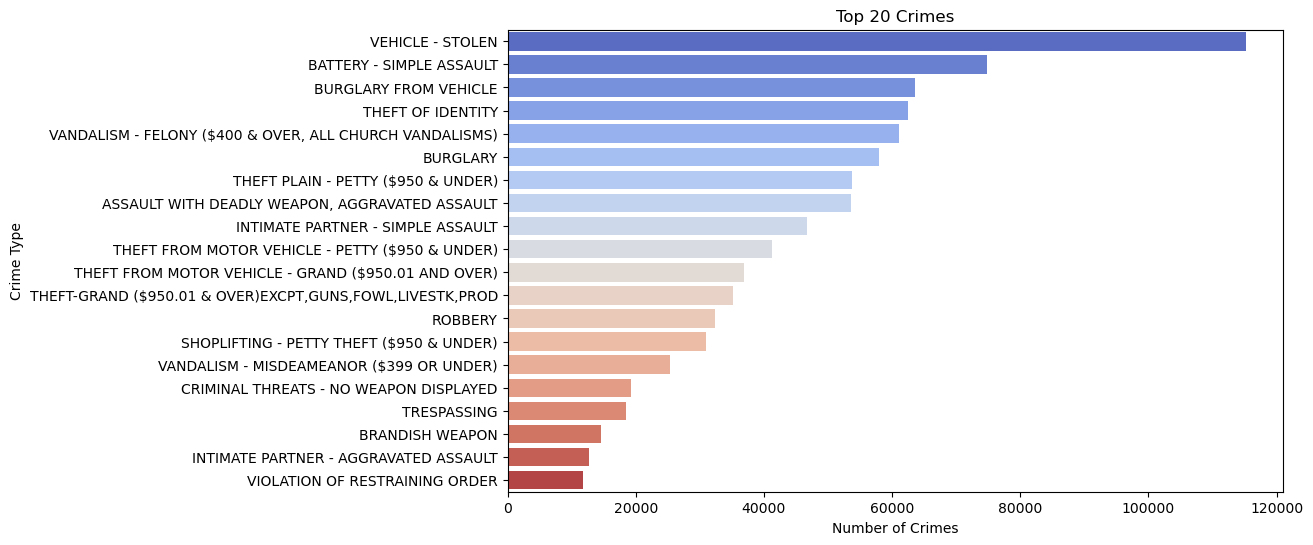

In [10]:
"""
Esta claro que esta froma de presentar los datos no es la más adecuada, ya que hay demasiados tipos de crímenes y no se pueden visualizar de forma clara. Por ello, vamos a seleccionar los 20 crímenes más comunes y a visualizarlos en un gráfico de barras.
"""

top_20_crimes = df_base['crm_cd_desc'].value_counts().head(20)
plt.figure(figsize=(10, 6))

sns.barplot(x=top_20_crimes.values, y=top_20_crimes.index, palette='coolwarm')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.title('Top 20 Crimes')
plt.show()

In [11]:
descent_code_dict = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}



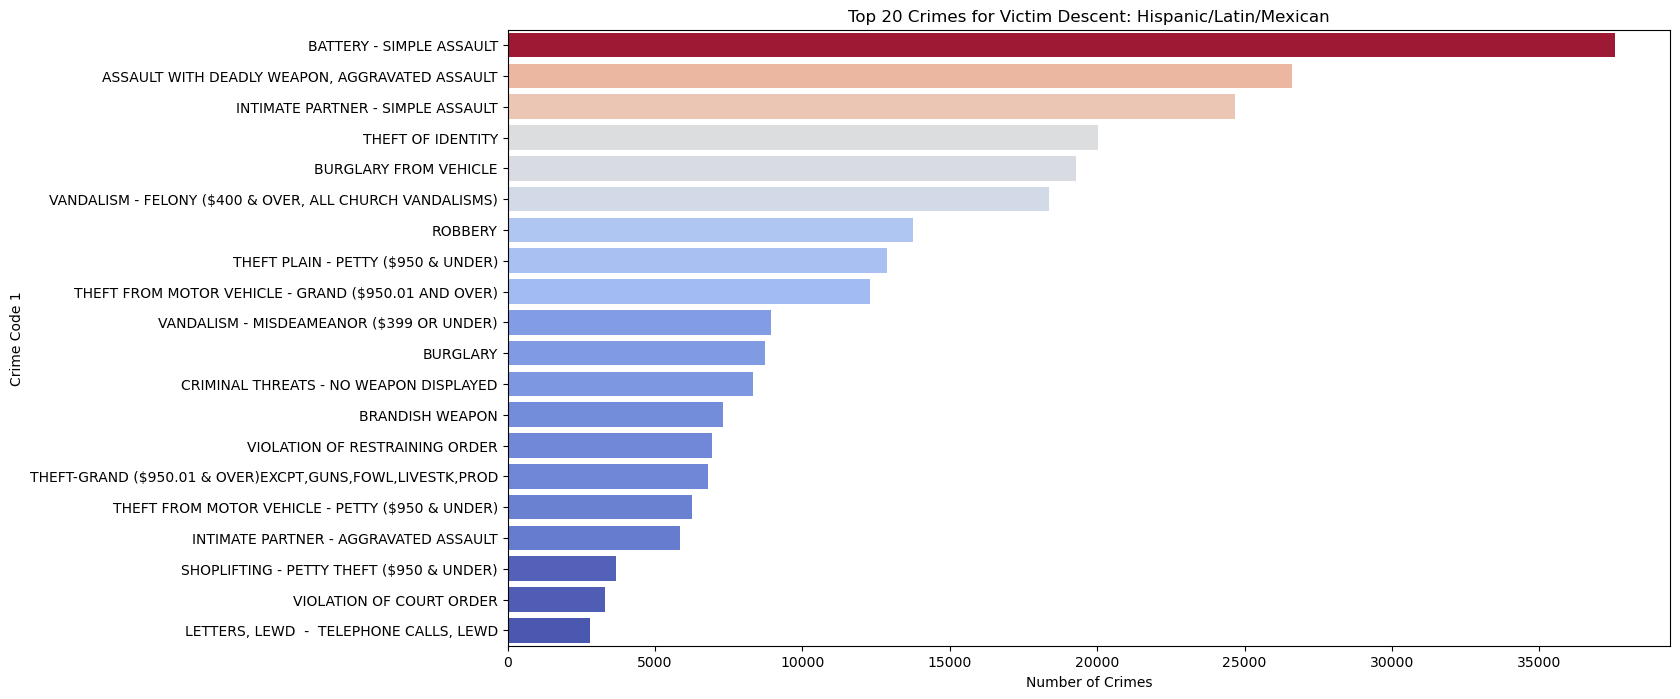

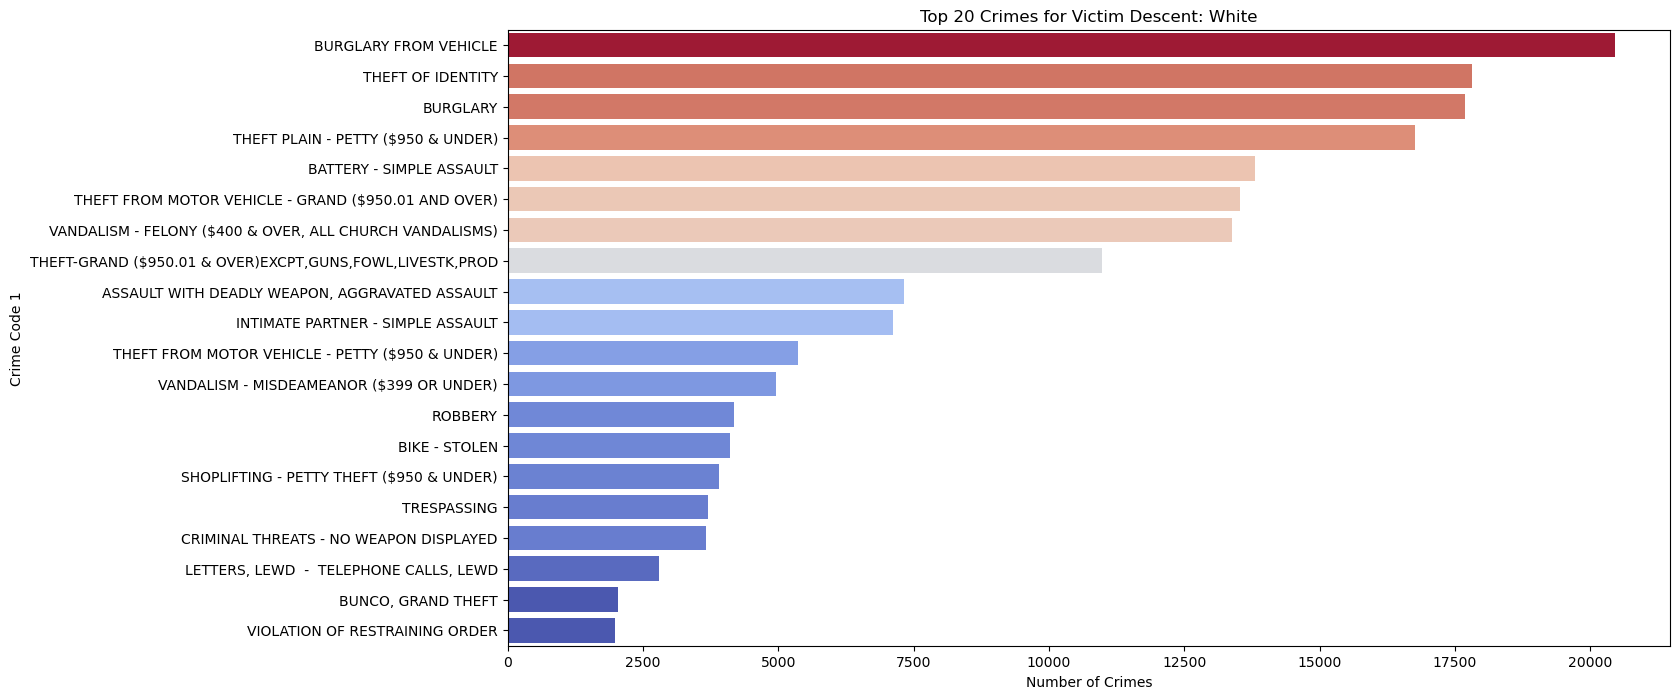

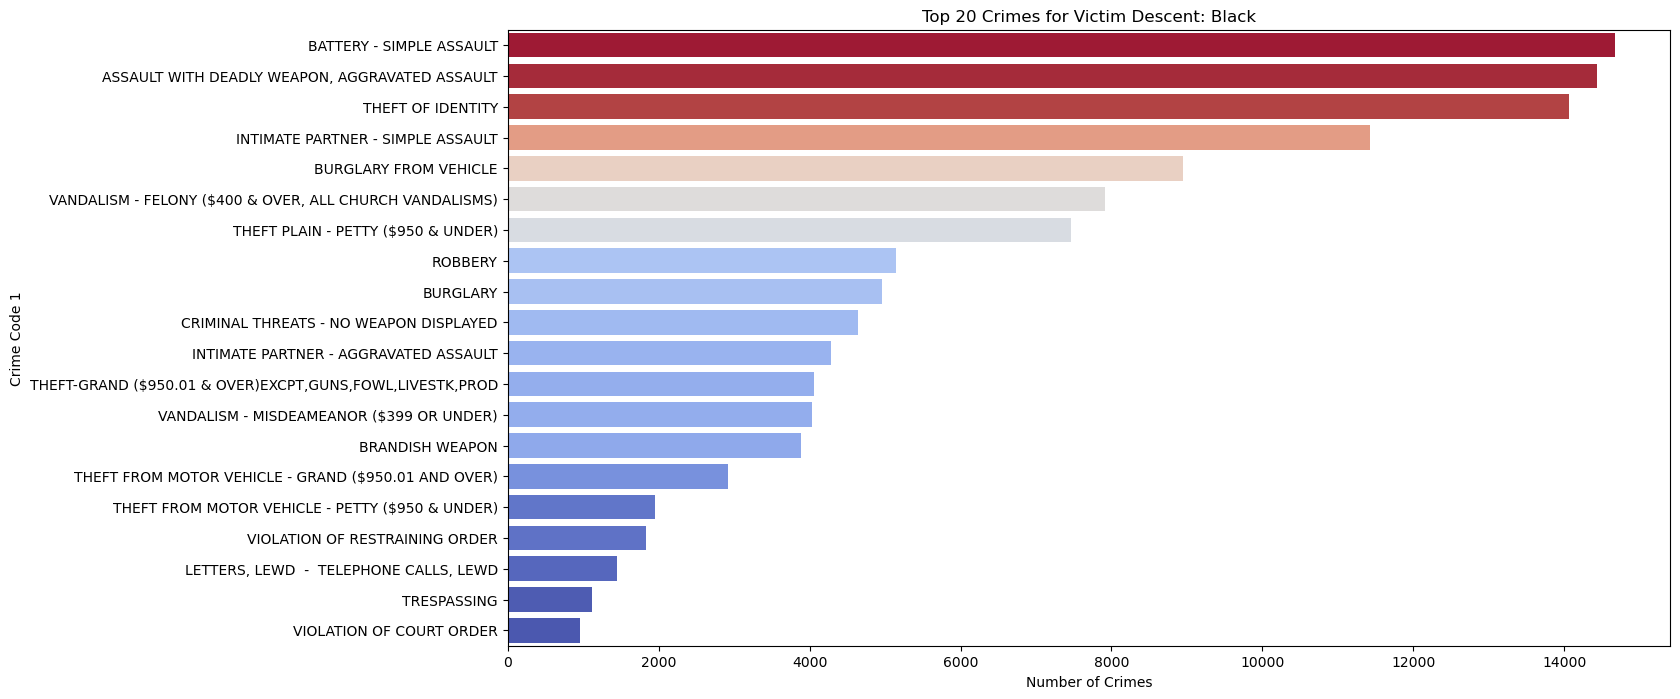

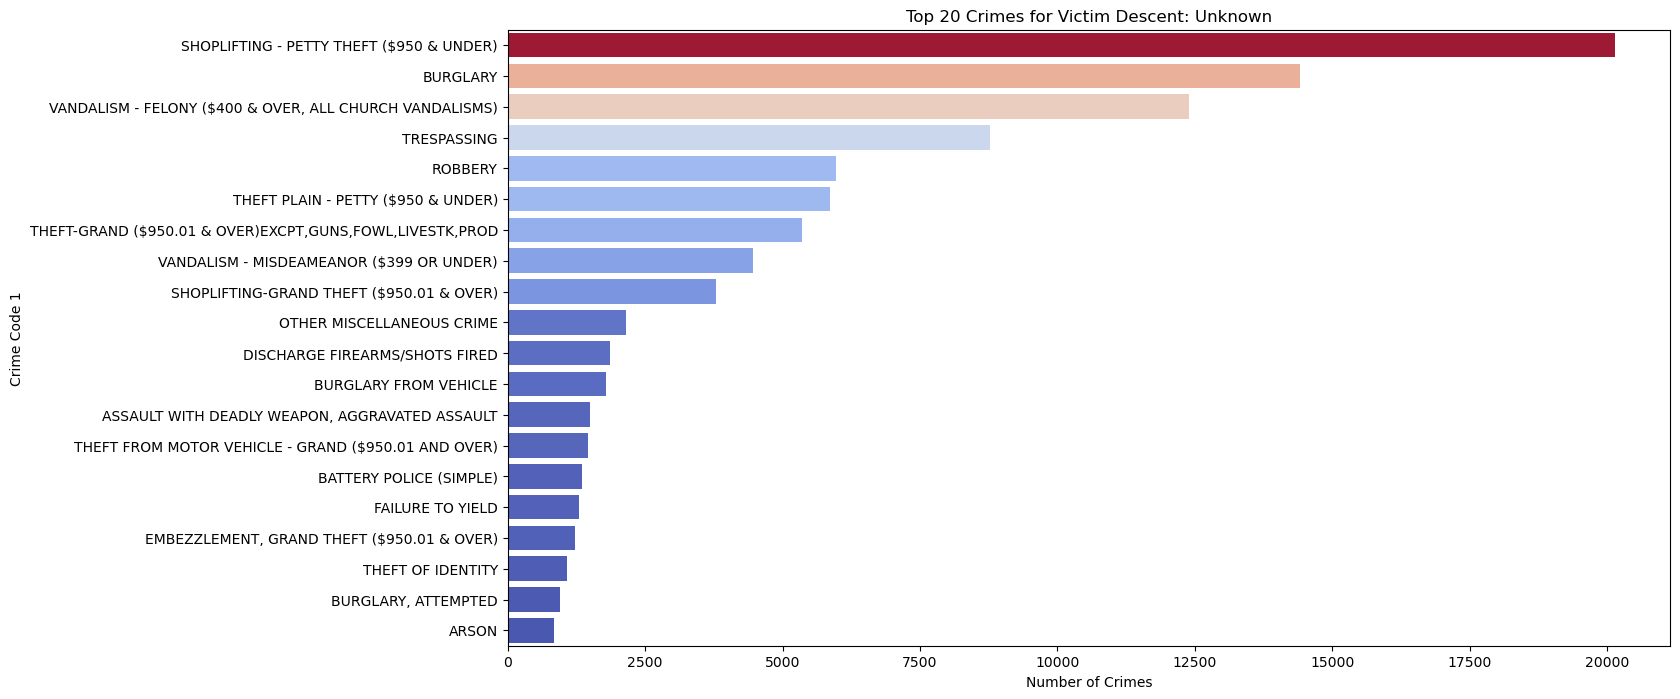

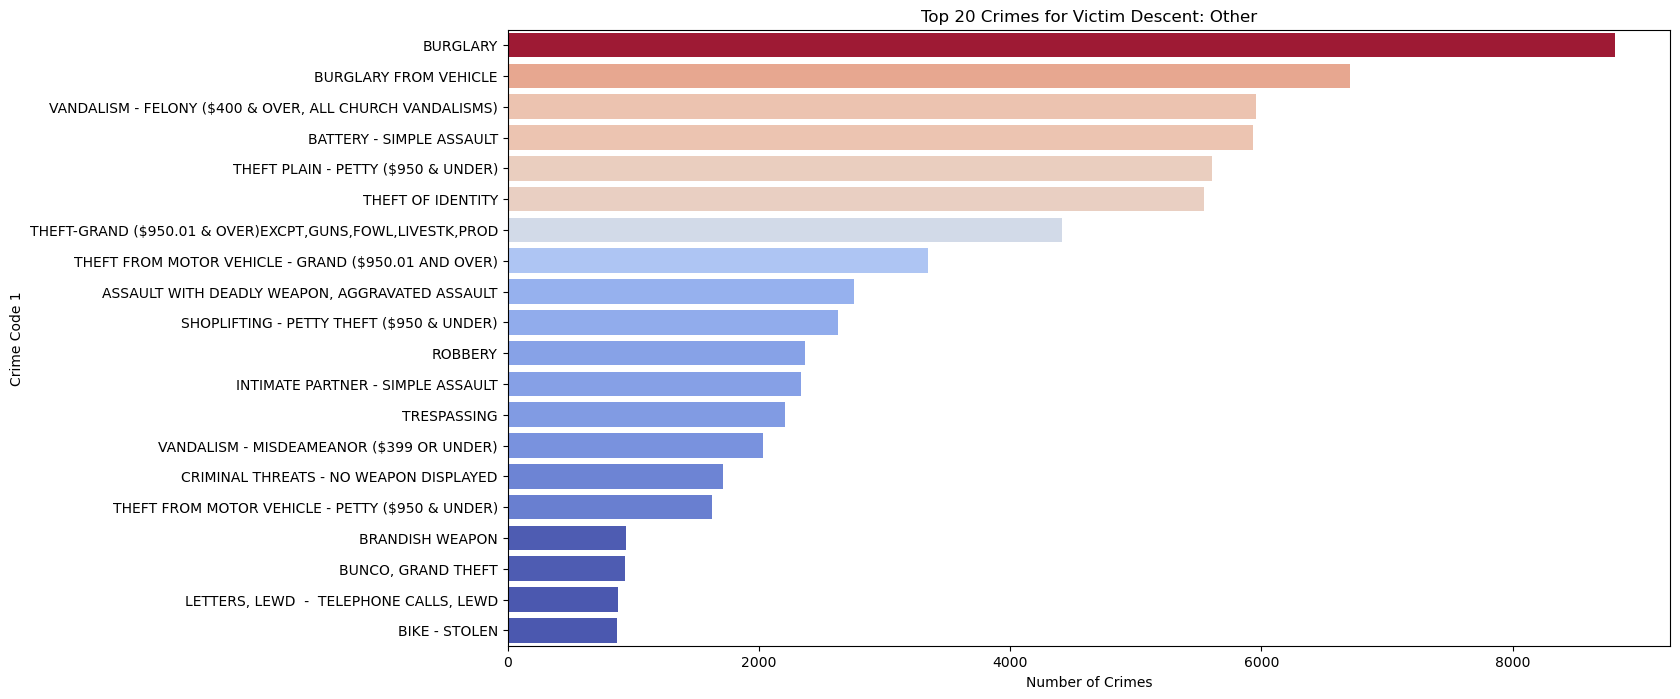

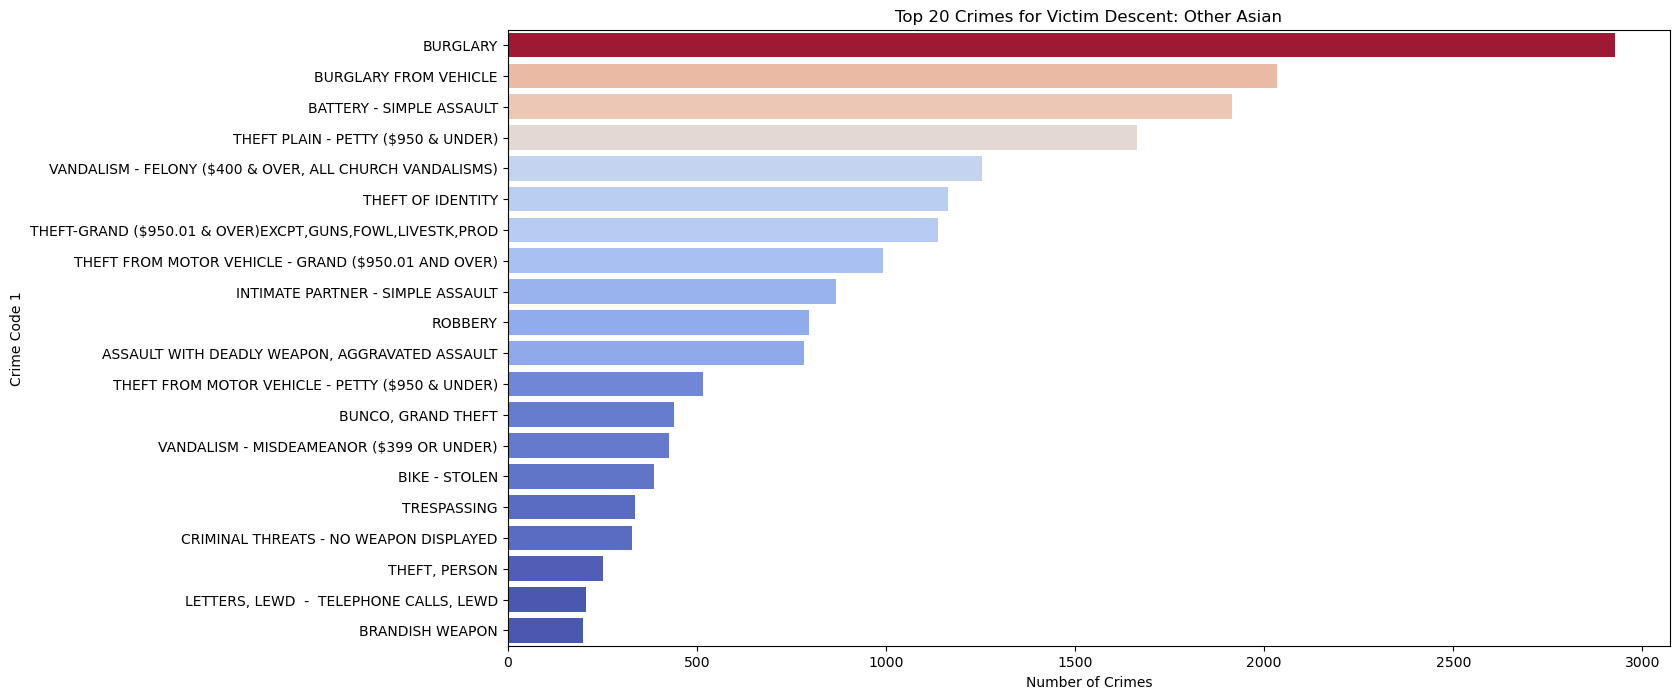

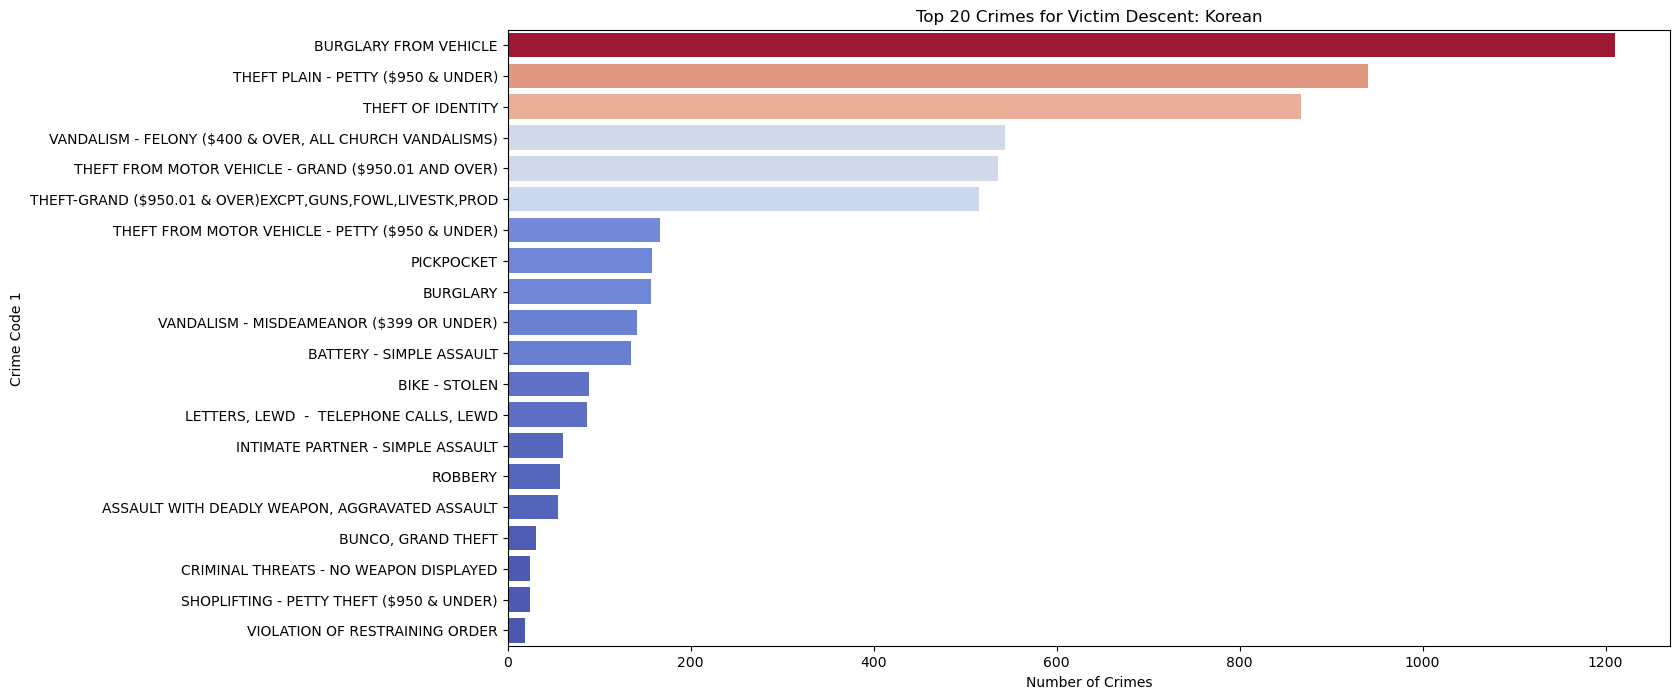

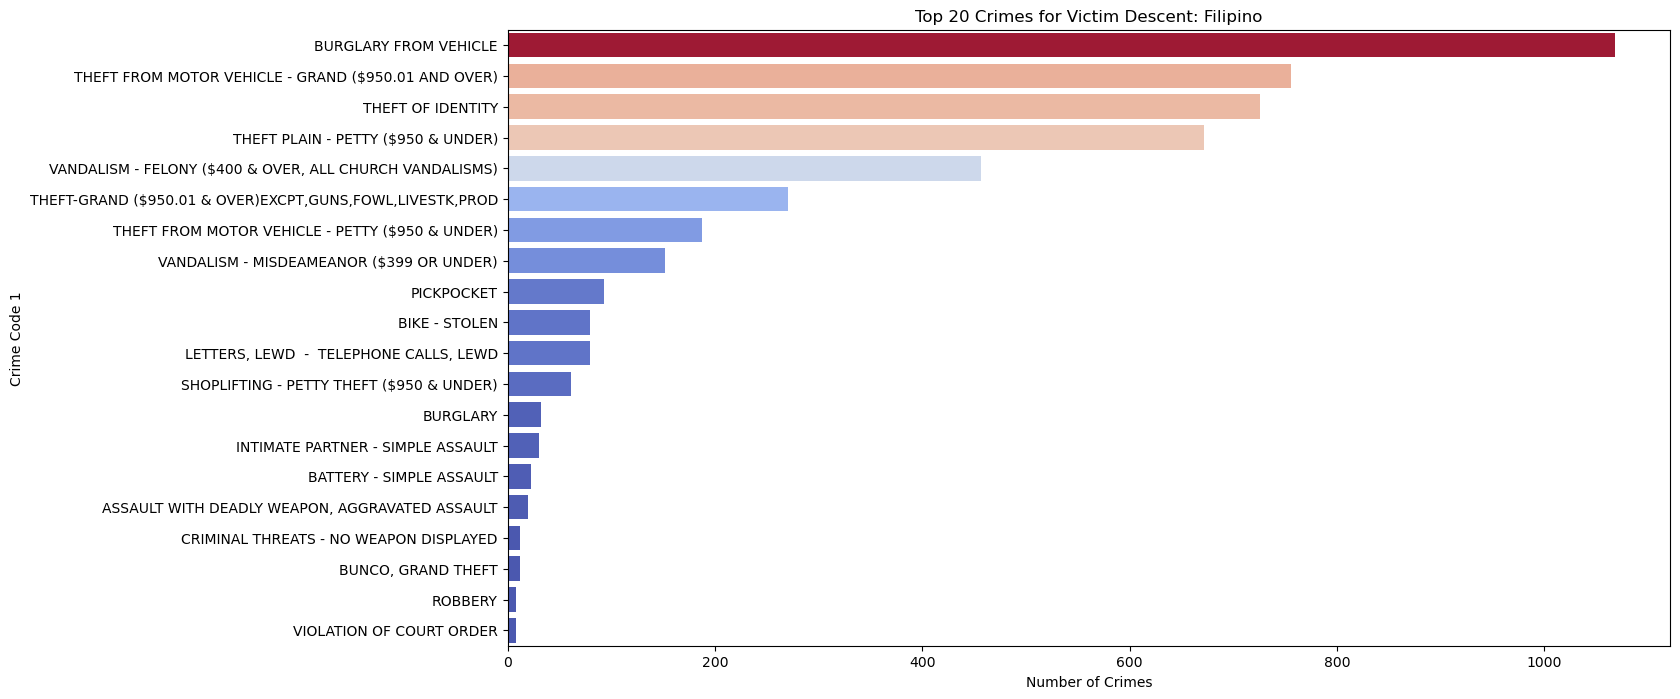

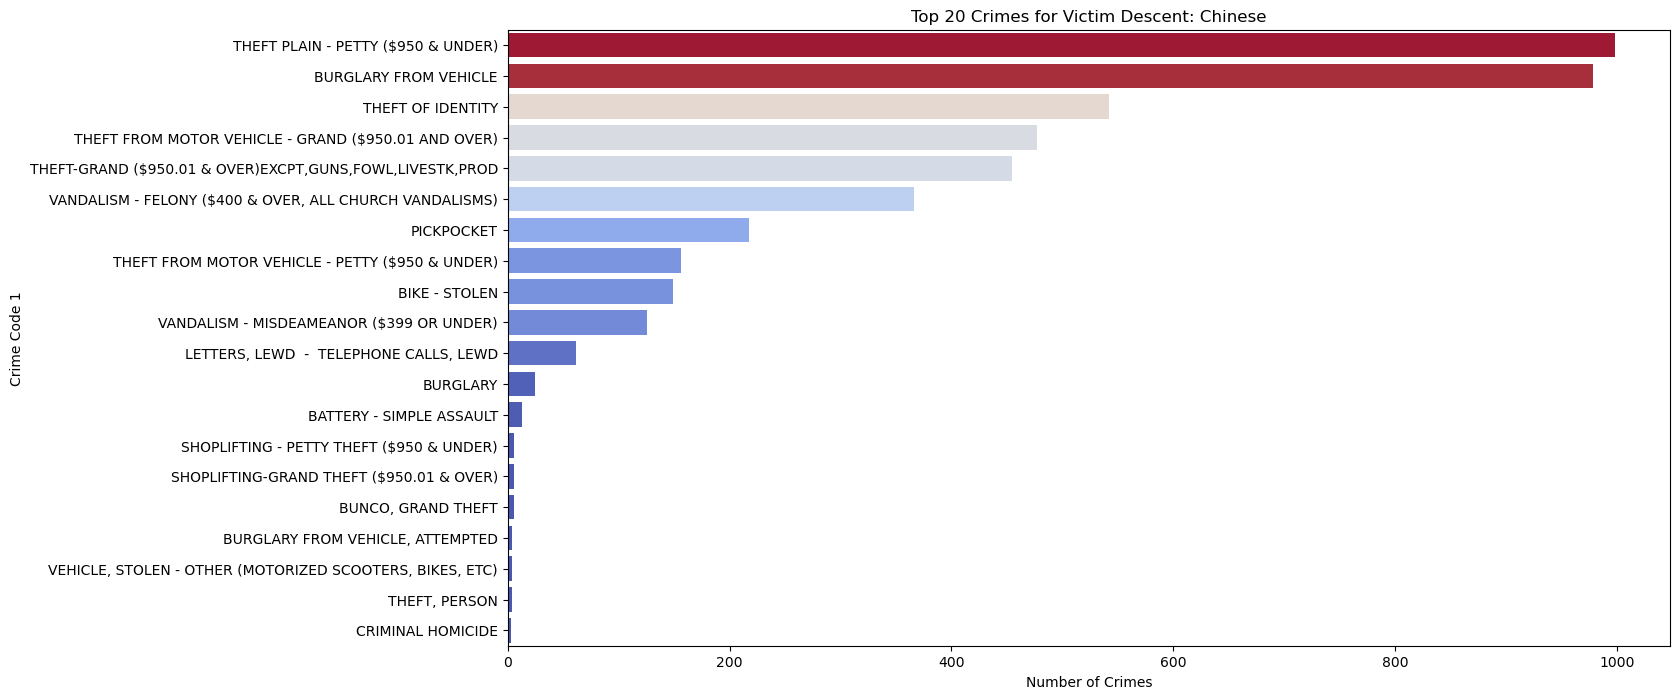

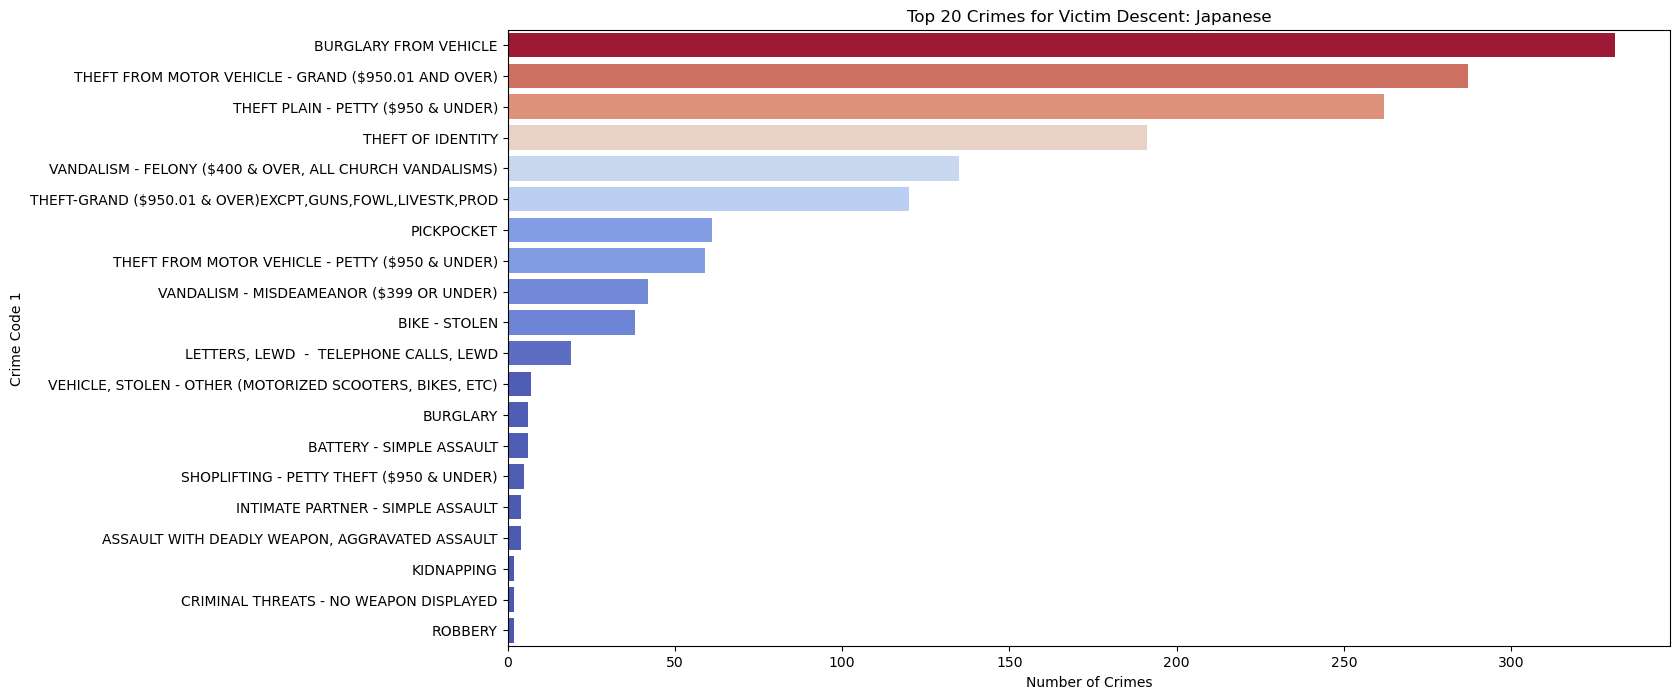

In [12]:
"""
Esto está bien para ver como se distribuye el número de crímenes en Los Ángeles de forma genérica, pero
podemos ver el tipo de crimenes en función del origen de la víctima, por ejemplo.
"""
descent_code_dict = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}

top_10_vict_descent = df_base['vict_descent'].map(descent_code_dict).value_counts().head(10).index

for descent in top_10_vict_descent:
    plt.figure(figsize=(15, 8))
    top_crimes = df_base[df_base['vict_descent'].map(descent_code_dict) == descent]['crm_cd_desc'].value_counts().head(20).reset_index()
    top_crimes.columns = ['crm_cd_desc', 'count']
    sns.barplot(data=top_crimes, x='count', y='crm_cd_desc', hue='count', palette='coolwarm', dodge=False, legend=False)
    plt.xlabel('Number of Crimes')
    plt.ylabel('Crime Code 1')
    plt.title(f'Top 20 Crimes for Victim Descent: {descent}')
    plt.show()

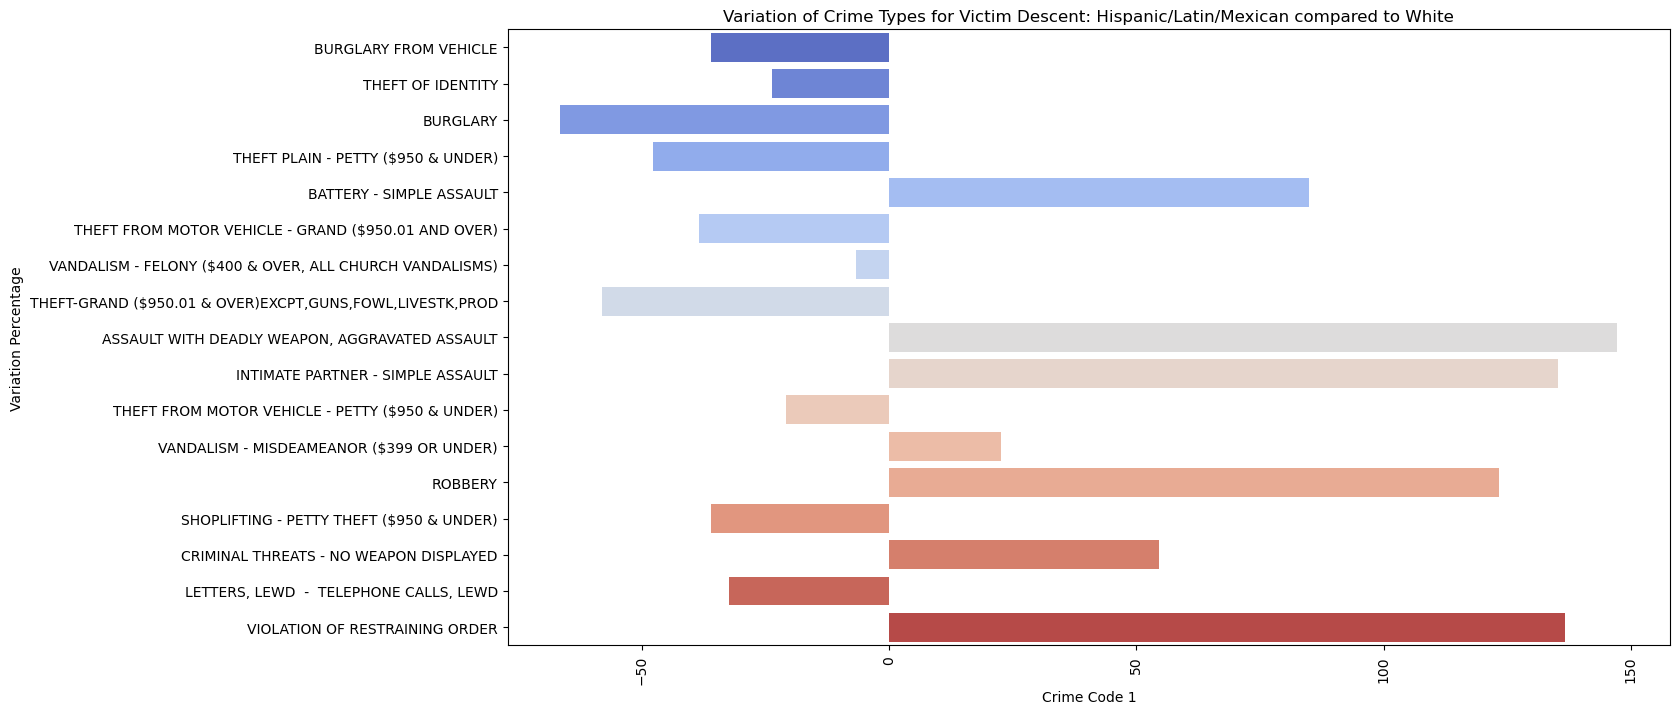

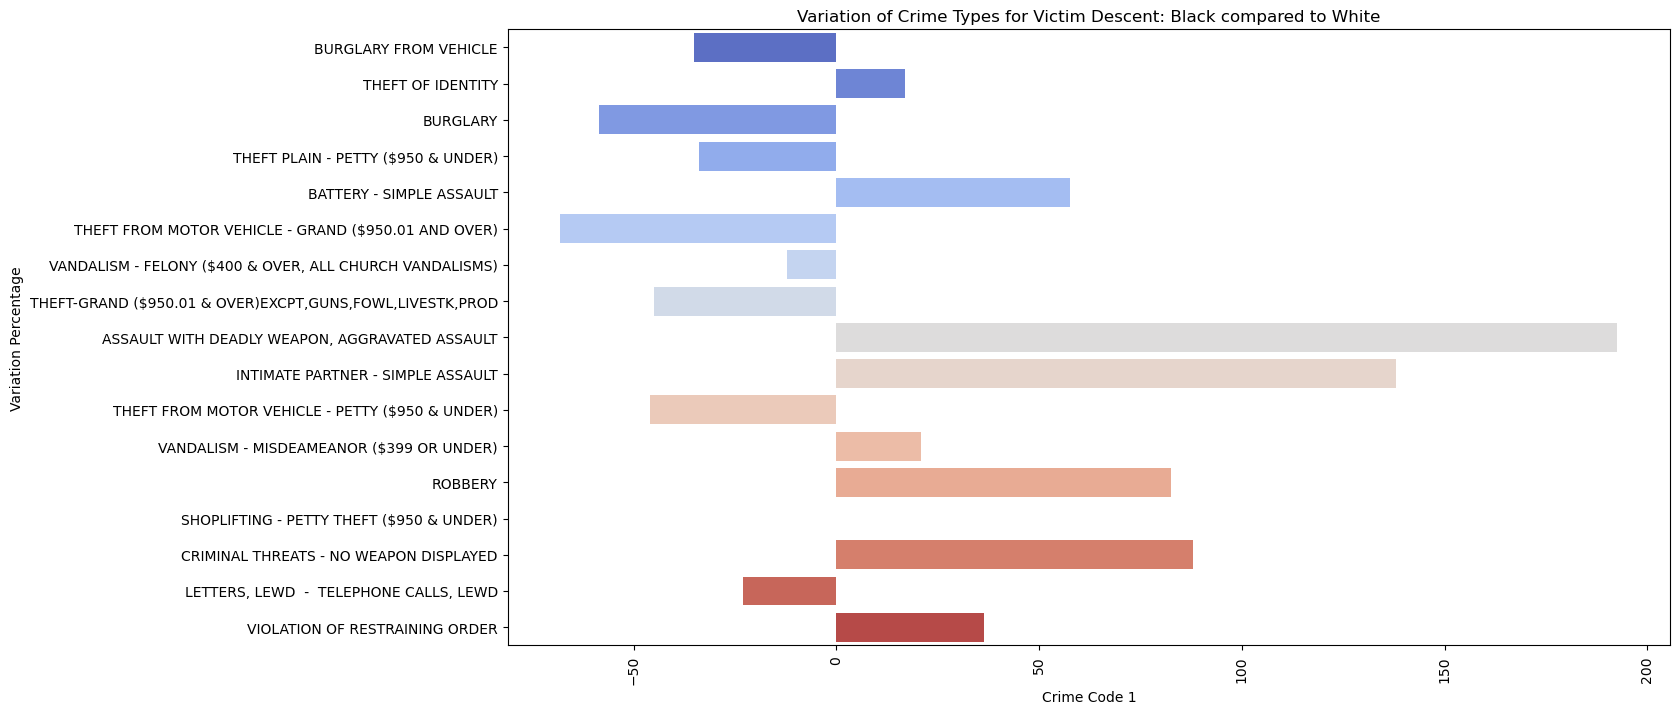

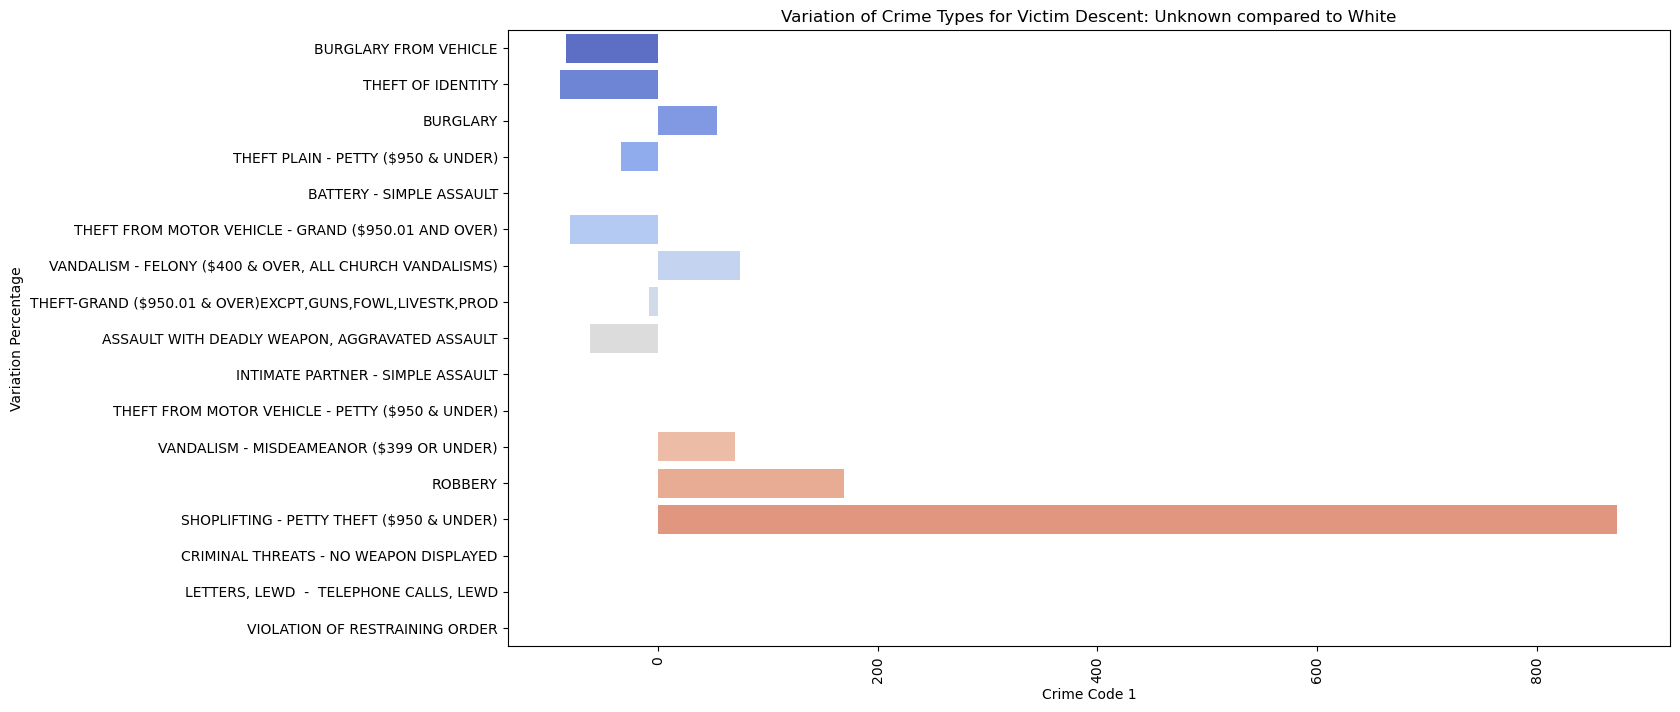

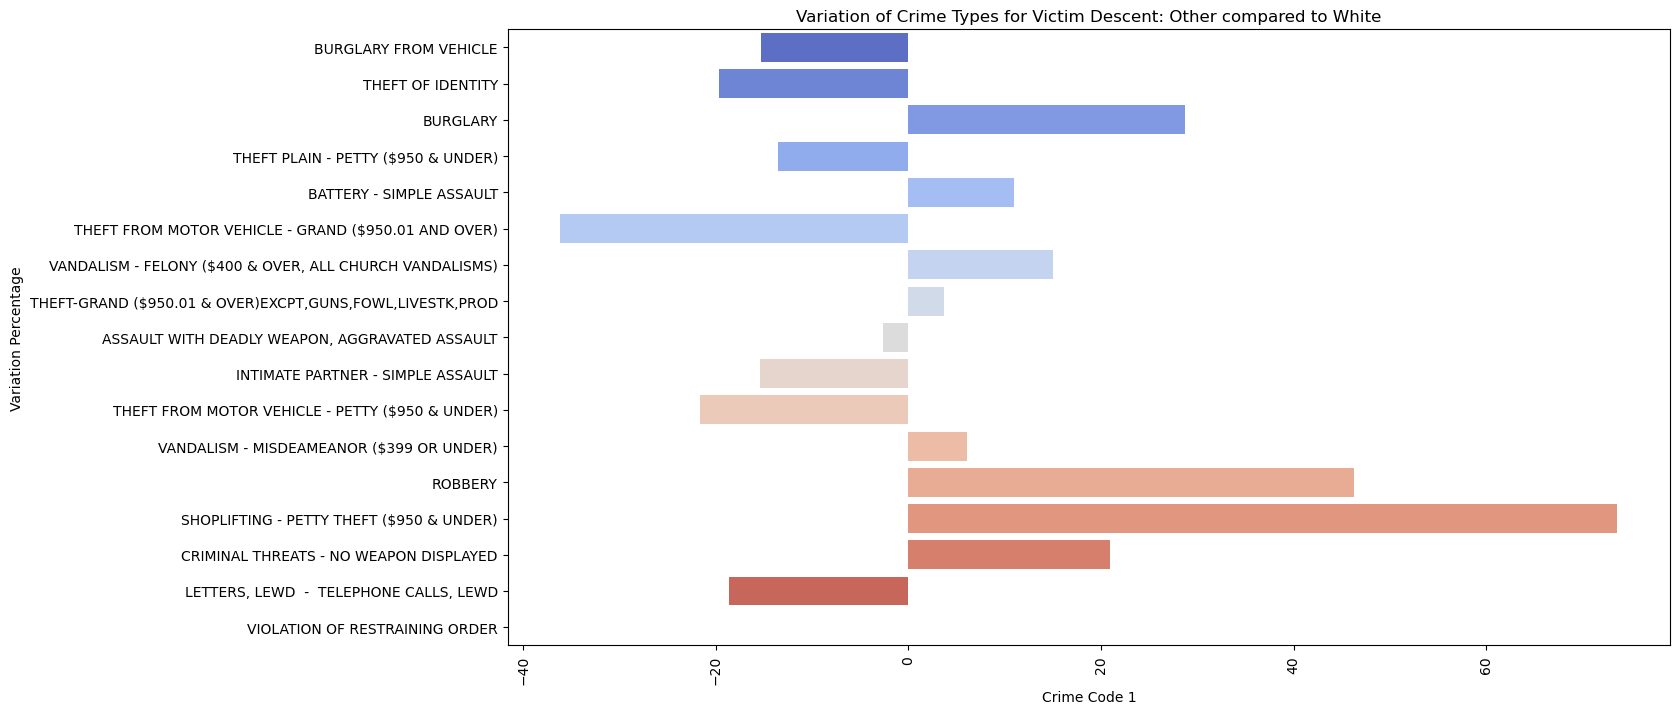

In [13]:
"""Ahora, vamos a mostrar porcentualmente la diferencia de tipos de crimenes en
funcion del origen de la victima con respecto al tipo de origen más numeroso en los angeles, el blanco."""


white_crimes = df_base[df_base['vict_descent'].map(descent_code_dict) == 'White']['crm_cd_desc'].value_counts(normalize=True).head(20)

# Obtener los 5 tipos de vict_descent más numerosos
top_5_vict_descent = df_base['vict_descent'].map(descent_code_dict).value_counts().head(5).index

# Crear un DataFrame para almacenar las variaciones porcentuales
variation_df = pd.DataFrame()

# Calcular la variación para cada uno de los 5 tipos de vict_descent más numerosos
for descent in top_5_vict_descent:
    if descent != 'White':  # Omitir los hombres blancos
        descent_crimes = df_base[df_base['vict_descent'].map(descent_code_dict) == descent]['crm_cd_desc'].value_counts(normalize=True).head(20)
        common_crimes = white_crimes.index.intersection(descent_crimes.index)
        descent_crimes = descent_crimes[common_crimes]
        white_crimes_common = white_crimes[common_crimes]
        variation = (descent_crimes - white_crimes_common) / white_crimes_common * 100
        variation_df[descent] = variation

# Crear gráficos de barras para cada tipo de vict_descent
for descent in variation_df.columns:
    plt.figure(figsize=(15, 8))
    top_crimes = variation_df[descent].reset_index()
    top_crimes.columns = ['crm_cd_desc', 'variation']
    sns.barplot(data=top_crimes, x='variation', y='crm_cd_desc', hue='crm_cd_desc', palette='coolwarm', dodge=False, legend=False)
    plt.xlabel('Crime Code 1')
    plt.ylabel('Variation Percentage')
    plt.title(f'Variation of Crime Types for Victim Descent: {descent} compared to White')
    plt.xticks(rotation=90)
    plt.show()

In [14]:
"""Ahora, una vez hemos echado un vistazo a los crímenes más comunes en Los Ángeles, vamos a centrarnos en los posibles sesgos
que pudiesesemos cometer en nuestro análisis. Para ello, vamos a ver qué pasa si filtramos por un área en concreto


West LA es una de las zonas con más homogeneidad demográfica de los Ángeles, 
por lo que es un buen punto de partida para analizar posibles sesgos en nuestro análisis.

Soutwest es una de las zonas con más diversidad demográfica de los Ángeles, 
por lo que es un buen punto de partida para analizar posibles sesgos en nuestro análisis.
"""

'Ahora, una vez hemos echado un vistazo a los crímenes más comunes en Los Ángeles, vamos a centrarnos en los posibles sesgos\nque pudiesesemos cometer en nuestro análisis. Para ello, vamos a ver qué pasa si filtramos por un área en concreto\n\n\nWest LA es una de las zonas con más homogeneidad demográfica de los Ángeles, \npor lo que es un buen punto de partida para analizar posibles sesgos en nuestro análisis.\n\nSoutwest es una de las zonas con más diversidad demográfica de los Ángeles, \npor lo que es un buen punto de partida para analizar posibles sesgos en nuestro análisis.\n'

In [15]:
# Filtrar los datos por el área de West LA
west_la_df = df_base[df_base['area_name'] == 'West LA']

# Verificamos qué porcentaje de los crimenes se cometen en West LA
west_la_crimes = west_la_df.shape[0] / df_base.shape[0] * 100
print(f'Percentage of Crimes in West LA: {west_la_crimes:.2f}%')



Percentage of Crimes in West LA: 4.55%


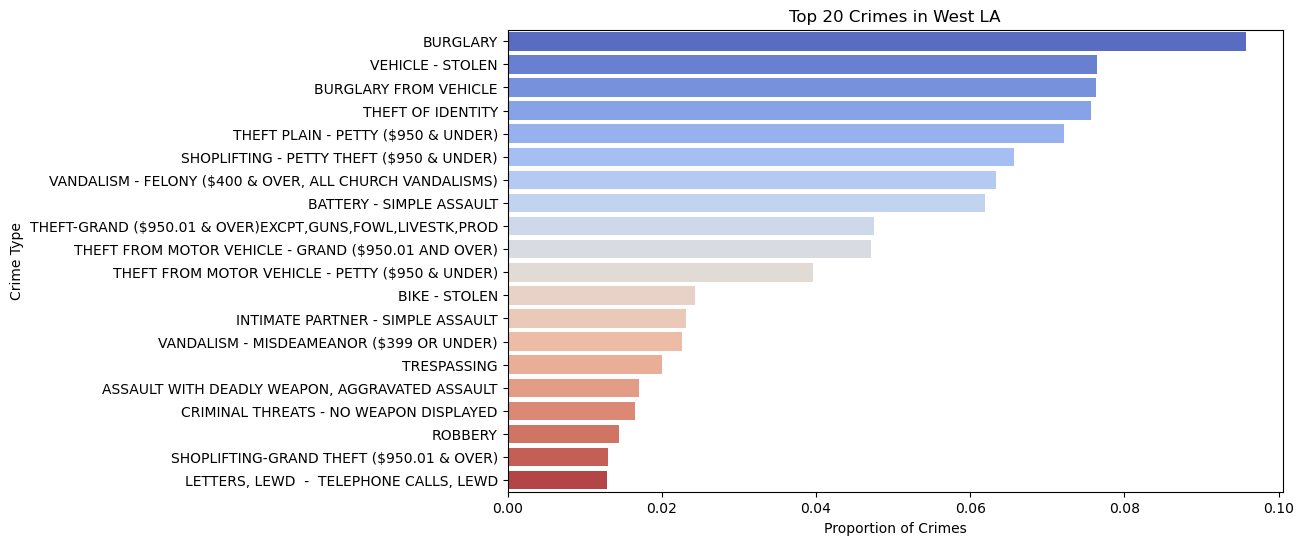

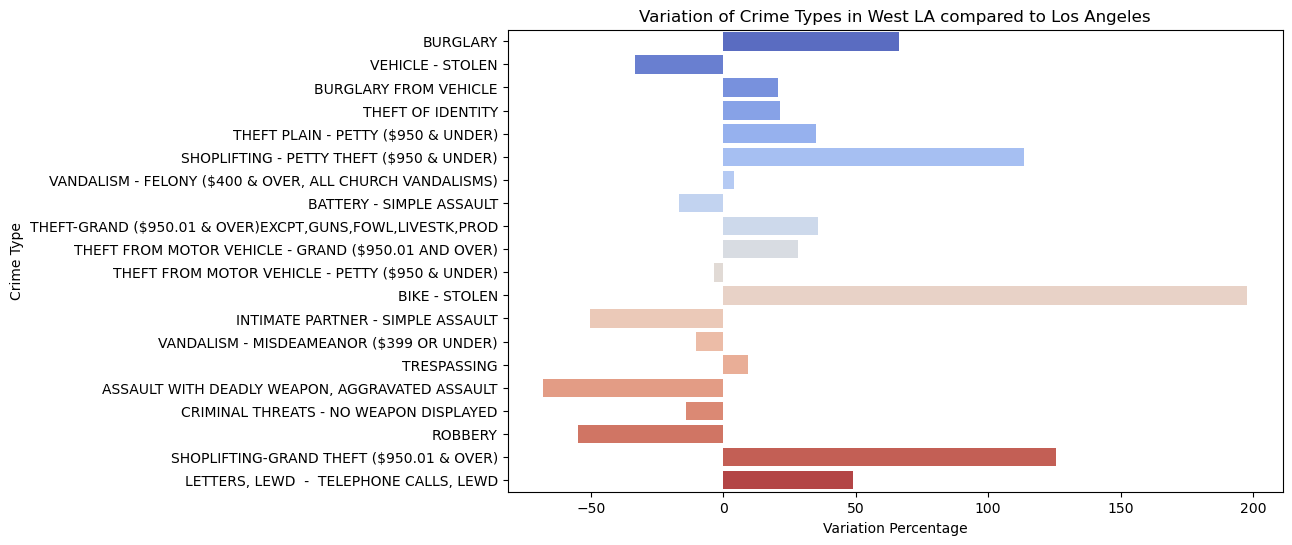

In [16]:
"""
El 4.55% de los crimenes se cometen en West LA, por lo que podríamos considerarlo una muestra. Ahora, tenemos que verificar si los crímenes que se cometen en West LA son representativos de los crímenes que se cometen en Los Ángeles en general.
"""

# Calcular la distribución de los tipos de crímenes para West LA
west_la_crimes_total = west_la_df['crm_cd_desc'].value_counts()
west_la_crimes = west_la_crimes_total / west_la_crimes_total.sum()

# Calcular la distribución de los tipos de crímenes para Los Ángeles en general
la_crimes_total = df_base['crm_cd_desc'].value_counts()
la_crimes = la_crimes_total / la_crimes_total.sum()

# Obtener los 20 tipos de crímenes más comunes en West LA
west_la_top_crimes = west_la_crimes.head(20)

# Asegurarse de que solo se consideren los mismos crímenes en ambas zonas
common_crimes = west_la_top_crimes.index.intersection(la_crimes.index)
west_la_top_crimes = west_la_top_crimes[common_crimes]
la_top_crimes = la_crimes[common_crimes]

# Calcular la variación porcentual
variation = (west_la_top_crimes - la_top_crimes) / la_top_crimes * 100
variation = variation.dropna()

# Graficar los 20 tipos de crímenes más comunes en West LA
plt.figure(figsize=(10, 6))
sns.barplot(x=west_la_top_crimes.values, y=west_la_top_crimes.index, palette='coolwarm')
plt.xlabel('Proportion of Crimes')
plt.ylabel('Crime Type')
plt.title('Top 20 Crimes in West LA')
plt.show()

# Graficar la variación porcentual de los tipos de crímenes en West LA comparado con Los Ángeles
plt.figure(figsize=(10, 6))
sns.barplot(x=variation.values, y=variation.index, palette='coolwarm')
plt.xlabel('Variation Percentage')
plt.ylabel('Crime Type')
plt.title('Variation of Crime Types in West LA compared to Los Angeles')
plt.show()

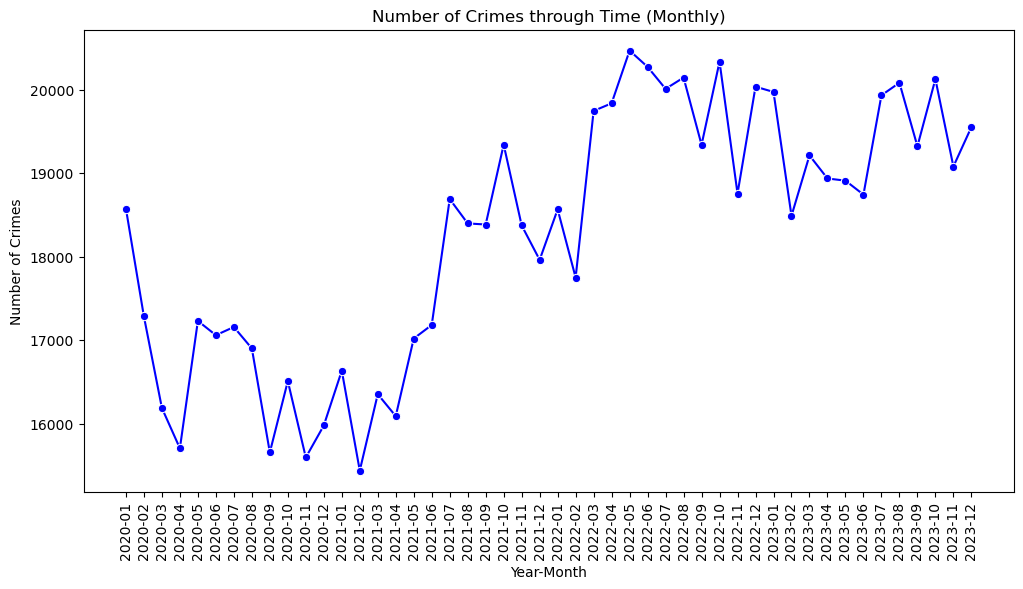

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna date_occ a formato de fecha
df_base['date_occ'] = pd.to_datetime(df_base['date_occ'])

# Extraer el año y el mes de la columna date_occ
df_base['year_month'] = df_base['date_occ'].dt.to_period('M')

#filter by max dec 2023
df_base = df_base[df_base['year_month'] <= '2023-12']

# Contar el número de crímenes por mes
monthly_crimes = df_base['year_month'].value_counts().sort_index()

# Graficar la línea de tiempo de crímenes por mes
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_crimes.index.astype(str), y=monthly_crimes.values, marker='o', color='blue')
plt.xlabel('Year-Month')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes through Time (Monthly)')
plt.xticks(rotation=90)
plt.show()

# La importancia de la verificación de los datos

In [18]:
df_base.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [ ]:
# ver los estadisticos de la edad de la victima

df_base['vict_age'].describe()

"""
Debemos tener en cuenta que los datos no siempre son perfectos y que pueden contener errores. Por ejemplo, la edad de la víctima no puede ser negativa,
o destacar la excesiva edad de la victima de 120 años.
"""

count    877322.000000
mean         29.711081
std          21.813620
min          -4.000000
25%           3.000000
50%          31.000000
75%          45.000000
max         120.000000
Name: vict_age, dtype: float64